In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
!gdown --id 1Q2-5ejd-hyGk9yVDkhhFkFFh5ppbbDCM

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q2-5ejd-hyGk9yVDkhhFkFFh5ppbbDCM
To: /content/appended_sentiment_final.csv
100% 697k/697k [00:00<00:00, 78.5MB/s]


In [ ]:
Dataset = pd.read_csv('/content/appended_sentiment_final.csv')

In [ ]:
Dataset

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,posts,Mach,LSRP12,LSRP2,NRSM,languages,Length,sentiment,person,Person,sentiment score
0,0,0,0,0,my heart my soul..T-T,68.0,1.3,2.5,3.0,en,21,anger,2,2,0.839829
1,1,1,2,2,Free speech is a joke in this country,68.0,1.3,2.5,3.0,en,37,joy,2,2,0.628497
2,2,2,5,5,Make 500 sequels I don't care.Make another Jus...,68.0,1.3,2.5,3.0,en,110,sadness,2,2,0.973745
3,3,3,6,6,Everybody wants a piece of the politically cor...,68.0,1.3,2.5,3.0,en,55,joy,2,2,0.992939
4,4,4,10,10,And that's how a movement dies.,68.0,1.3,2.5,3.0,en,31,sadness,2,2,0.975138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,4516,8720,12743,12743,This broke my heart... May the departed soul r...,53.0,1.9,3.1,19.0,en,59,sadness,100,100,0.996404
4409,4517,8721,12744,12744,:( First Massive crash with Bangladeshi passen...,53.0,1.9,3.1,19.0,en,112,sadness,100,100,0.997924
4410,4518,8722,12745,12745,TWO SUPERHUMANS IN ONE FRAME <3,53.0,1.9,3.1,19.0,en,31,fear,100,100,0.482973
4411,4519,8723,12746,12746,Man!!!\nThe chase- UNBELIEVABLE!! Mushi and Ri...,53.0,1.9,3.1,19.0,en,72,joy,100,100,0.834204


In [ ]:
Dataset.head()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,posts,Mach,LSRP12,LSRP2,NRSM,languages,Length,sentiment,person,Person,sentiment score
0,0,0,0,0,my heart my soul..T-T,68.0,1.3,2.5,3.0,en,21,anger,2,2,0.839829
1,1,1,2,2,Free speech is a joke in this country,68.0,1.3,2.5,3.0,en,37,joy,2,2,0.628497
2,2,2,5,5,Make 500 sequels I don't care.Make another Jus...,68.0,1.3,2.5,3.0,en,110,sadness,2,2,0.973745
3,3,3,6,6,Everybody wants a piece of the politically cor...,68.0,1.3,2.5,3.0,en,55,joy,2,2,0.992939
4,4,4,10,10,And that's how a movement dies.,68.0,1.3,2.5,3.0,en,31,sadness,2,2,0.975138


In [ ]:
Dataset.sentiment.value_counts()

joy         2738
anger       1046
sadness      331
fear         197
love          68
surprise      33
Name: sentiment, dtype: int64

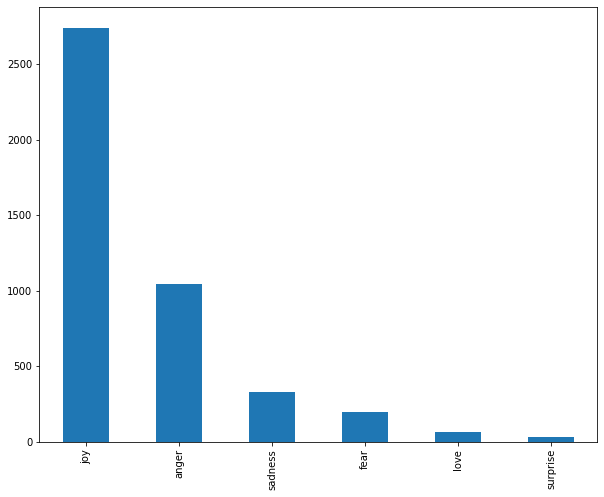

In [ ]:
rcParams['figure.figsize'] = 10,8
Dataset.sentiment.value_counts().plot(kind="bar")

## Sepearting the dataset into the different dataframe based on the label column


As there are 6 label, so we will be needing 6 separate dataset.

In [ ]:
joy = Dataset[Dataset['sentiment']=="joy"]
anger= Dataset[Dataset['sentiment']=="anger"]
sadness = Dataset[Dataset['sentiment']=="sadness"]
fear = Dataset[Dataset['sentiment']=="fear"]
love = Dataset[Dataset['sentiment']=="love"]
surprize = Dataset[Dataset['sentiment']=="surprize"]
print(joy.shape)
print(anger.shape)

(2738, 15)
(1046, 15)


In [ ]:
anger

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,posts,Mach,LSRP12,LSRP2,NRSM,languages,Length,sentiment,person,Person,sentiment score
0,0,0,0,0,my heart my soul..T-T,68.0,1.3,2.5,3.0,en,21,anger,2,2,0.839829
6,6,7,16,16,Underdogs all the way boiiiii,68.0,1.3,2.5,3.0,en,29,anger,2,2,0.977080
11,11,12,29,29,"Damn it stop stealing articles from the onion,...",68.0,1.3,2.5,3.0,en,51,anger,2,2,0.995258
12,12,15,32,32,welp time to delete the memes...,68.0,1.3,2.5,3.0,en,32,anger,2,2,0.501875
13,13,16,33,33,The onion called they want their article back,68.0,1.3,2.5,3.0,en,45,anger,2,2,0.987921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,4493,8688,12706,12706,BENZEMA! Seriously?!! 🤨🤨😁😁,53.0,1.9,3.1,19.0,en,26,anger,100,100,0.789848
4391,4498,8694,12713,12713,The Magician on 🔥🔥,53.0,1.9,3.1,19.0,en,18,anger,100,100,0.470116
4400,4508,8707,12730,12730,He Likes It Cold :3\n\nCOMING S O O N,53.0,1.9,3.1,19.0,en,35,anger,100,100,0.993506
4402,4510,8710,12733,12733,Binge watching :v,53.0,1.9,3.1,19.0,en,17,anger,100,100,0.757341


In [ ]:
# print the max lenth of words of post
joy_text_len = joy['posts'].str.len()
print("The maximum lenght of string in Politcs news is {} words".format(max(joy_text_len)))
anger_text_len = anger['posts'].str.len()

The maximum lenght of string in Politcs news is 505 words


In [ ]:
anger_text_len = anger['posts'].str.len()
print("The maximum lenght of string in Politcs news is {} words".format(max(anger_text_len)))


The maximum lenght of string in Politcs news is 497 words


In [ ]:
sadness_text_len = sadness['posts'].str.len()
print("The maximum lenght of string in Politcs news is {} words".format(max(sadness_text_len)))


The maximum lenght of string in Politcs news is 494 words


In [ ]:
love_text_len = love['posts'].str.len()
print("The maximum lenght of string in Politcs news is {} words".format(max(love_text_len)))


The maximum lenght of string in Politcs news is 480 words


In [ ]:
surprize_text_len = surprize['posts'].str.len()
print("The maximum lenght of string in Politcs news is {} words".format(max(surprize_text_len, default=0)))


The maximum lenght of string in Politcs news is 0 words


In [ ]:
fear_text_len = fear['posts'].str.len()
print("The maximum lenght of string in Politcs news is {} words".format(max(fear_text_len)))


The maximum lenght of string in Politcs news is 496 words


#Simple Pre-Processing on newly separated 6 datasets 

## Tokenization Stop words removal

**1. Tokenization:**
   In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.Here we are performing the word tokenization from NLTK Library.

**2. Stopwords:**
    stop words are words which are filtered out before or after processing of natural language data (text).[1] Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list.









In [ ]:
def tokenizeandstopwords(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
joy['posts'] = joy['posts'].apply(tokenizeandstopwords)


<ipython-input-35-6c75a5e29bb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joy['posts'] = joy['posts'].apply(tokenizeandstopwords)


In [ ]:
anger['posts'] = anger['posts'].apply(tokenizeandstopwords)
fear['posts'] = fear['posts'].apply(tokenizeandstopwords)
love['posts'] = love['posts'].apply(tokenizeandstopwords)
surprize['posts'] = surprize['posts'].apply(tokenizeandstopwords)
sadness['posts'] = sadness['posts'].apply(tokenizeandstopwords)

<ipython-input-36-26d5ee6bcb12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anger['posts'] = anger['posts'].apply(tokenizeandstopwords)
<ipython-input-36-26d5ee6bcb12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fear['posts'] = fear['posts'].apply(tokenizeandstopwords)
<ipython-input-36-26d5ee6bcb12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

##Word cloud

A tag cloud (word cloud or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color.[2] This format is useful for quickly perceiving the most prominent terms to determine its relative prominence. When used as website navigation aids, the terms are hyperlinked to items associated with the tag



##Defining the word Cloud function to generate the word cloud

In [ ]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (10, 8),
        facecolor = 'none',
        edgecolor = 'none')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

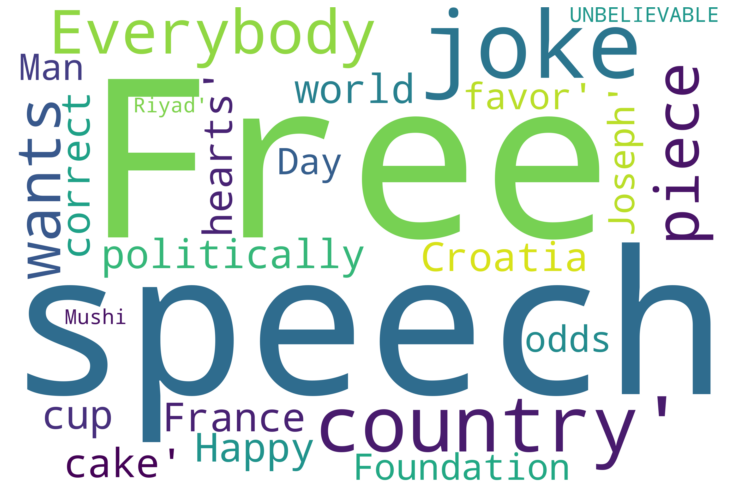

In [ ]:
joy_post = joy.posts.values
generate_word_cloud(joy_post)

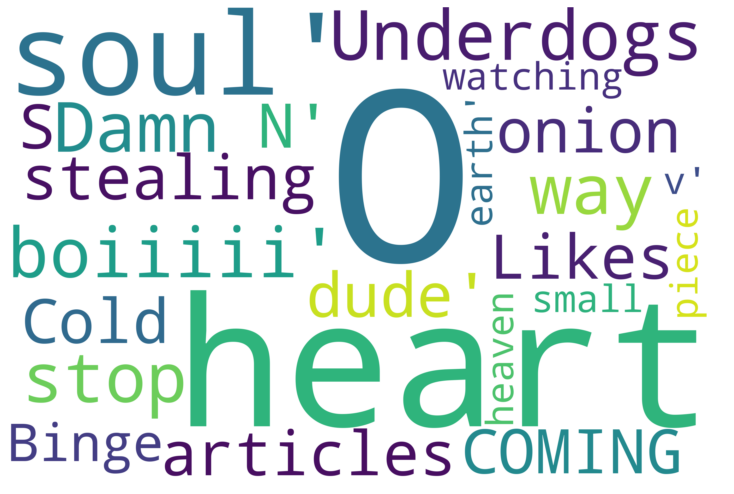

In [ ]:
anger_post = anger.posts.values
generate_word_cloud(anger_post)

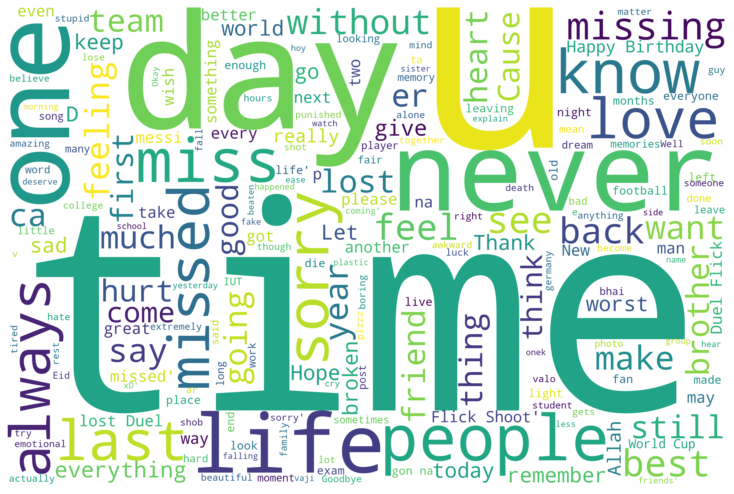

In [ ]:
sadness_post = sadness.posts.values
generate_word_cloud(sadness_post)

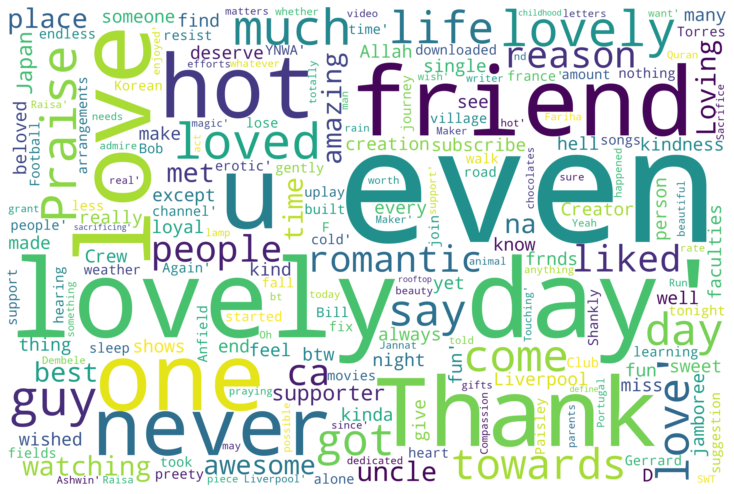

In [ ]:
love_post = love.posts.values
generate_word_cloud(love_post)

Text(0.5, 0, '# of Occurances')

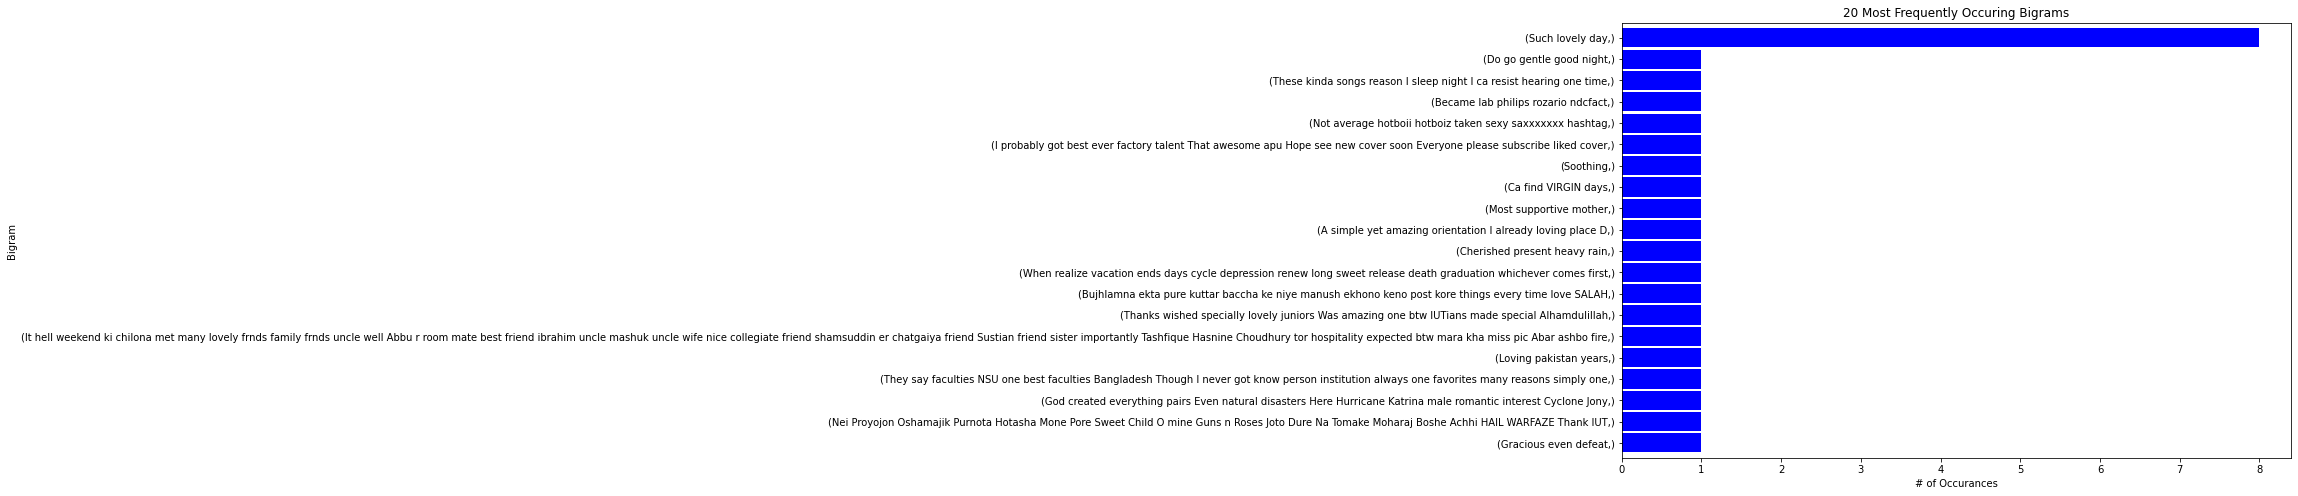

In [ ]:
love_series = (pd.Series(nltk.ngrams(love['posts'], 1)).value_counts())[:20]
love_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# Bi-gram word cloud

## cleaning posts

In [ ]:
Dataset['posts'] = Dataset['posts'].apply((lambda y:re.sub("http://\S+"," ", y)))
Dataset['posts'] = Dataset['posts'].apply((lambda x:re.sub("\@", " ",x.lower())))

In [ ]:
Dataset.head()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,posts,Mach,LSRP12,LSRP2,NRSM,languages,Length,sentiment,person,Person,sentiment score
0,0,0,0,0,my heart my soul..t-t,68.0,1.3,2.5,3.0,en,21,anger,2,2,0.839829
1,1,1,2,2,free speech is a joke in this country,68.0,1.3,2.5,3.0,en,37,joy,2,2,0.628497
2,2,2,5,5,make 500 sequels i don't care.make another jus...,68.0,1.3,2.5,3.0,en,110,sadness,2,2,0.973745
3,3,3,6,6,everybody wants a piece of the politically cor...,68.0,1.3,2.5,3.0,en,55,joy,2,2,0.992939
4,4,4,10,10,and that's how a movement dies.,68.0,1.3,2.5,3.0,en,31,sadness,2,2,0.975138


In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
true_word = basic_clean(''.join(str(Dataset['posts'].tolist())))

In [ ]:
#in love dataset

love_dataset_cleaned = basic_clean(''.join(str(love['posts'].tolist())))

##N-gram Analysis - Bigram and Trigram

In [ ]:
# bi-grams
love_bigrams_series = (pd.Series(nltk.ngrams(love_dataset_cleaned, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

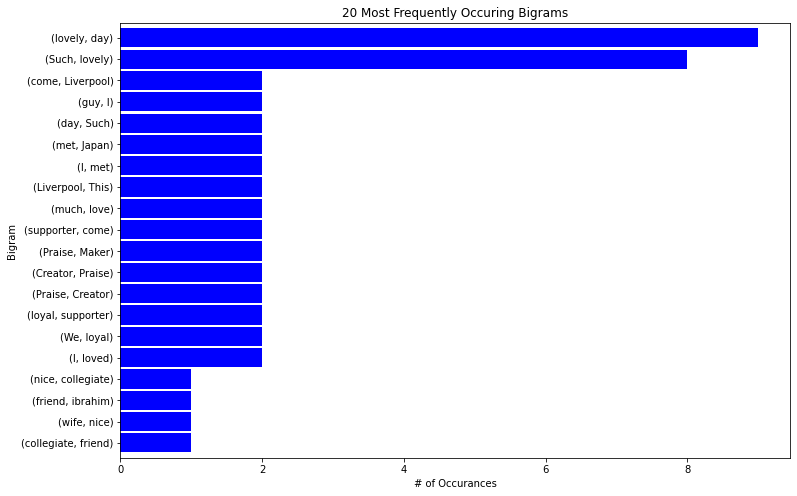

In [ ]:
love_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

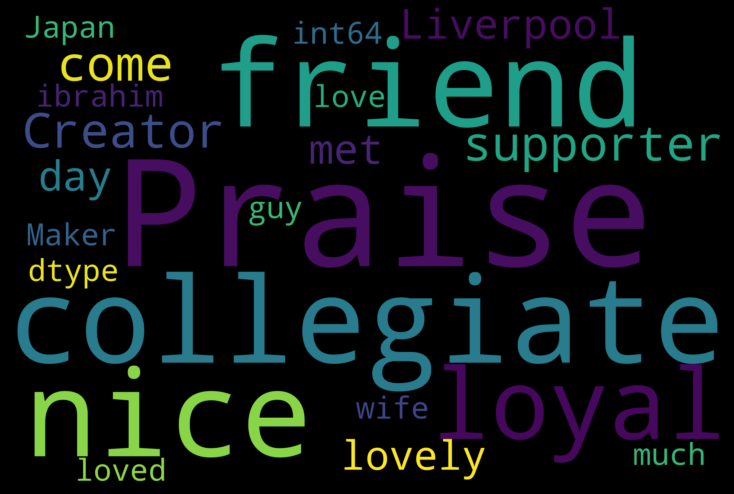

In [ ]:
generate_word_cloud(love_bigrams_series.sort_values())

Text(0.5, 0, '# of Occurances')

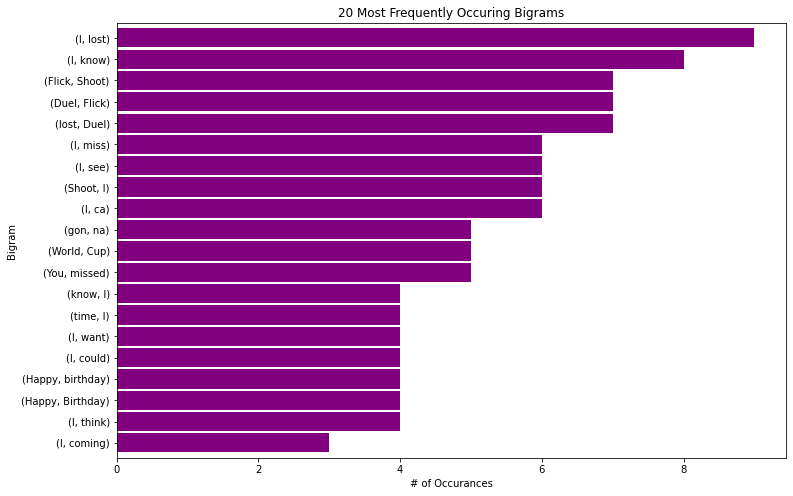

In [ ]:
# bi gram for sadness sub dataset
sadness_dataset_cleaned = basic_clean(''.join(str(sadness['posts'].tolist())))
sadness_bigrams_series = (pd.Series(nltk.ngrams(sadness_dataset_cleaned, 2)).value_counts())[:20]
sadness_bigrams_series.sort_values().plot.barh(color='purple', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')